# BERT(Bidirectional Encoder Representations from Transformers)
BERT is an open source machine learning framework for natural language processing (NLP). BERT is designed to help computers understand the meaning of ambiguous language in text by using surrounding text to establish context.    
It can understand the actual meaning of same words according to the situation.  
For example consider two words:
1. It is not fair.
2. Bus fair is so high.       
Here, the word "fair" is same but its meaning is different. BERT can understand that difference which was the drawback of Word2Vec.   
Google next sentence prediction while searching is implemented using BERT.

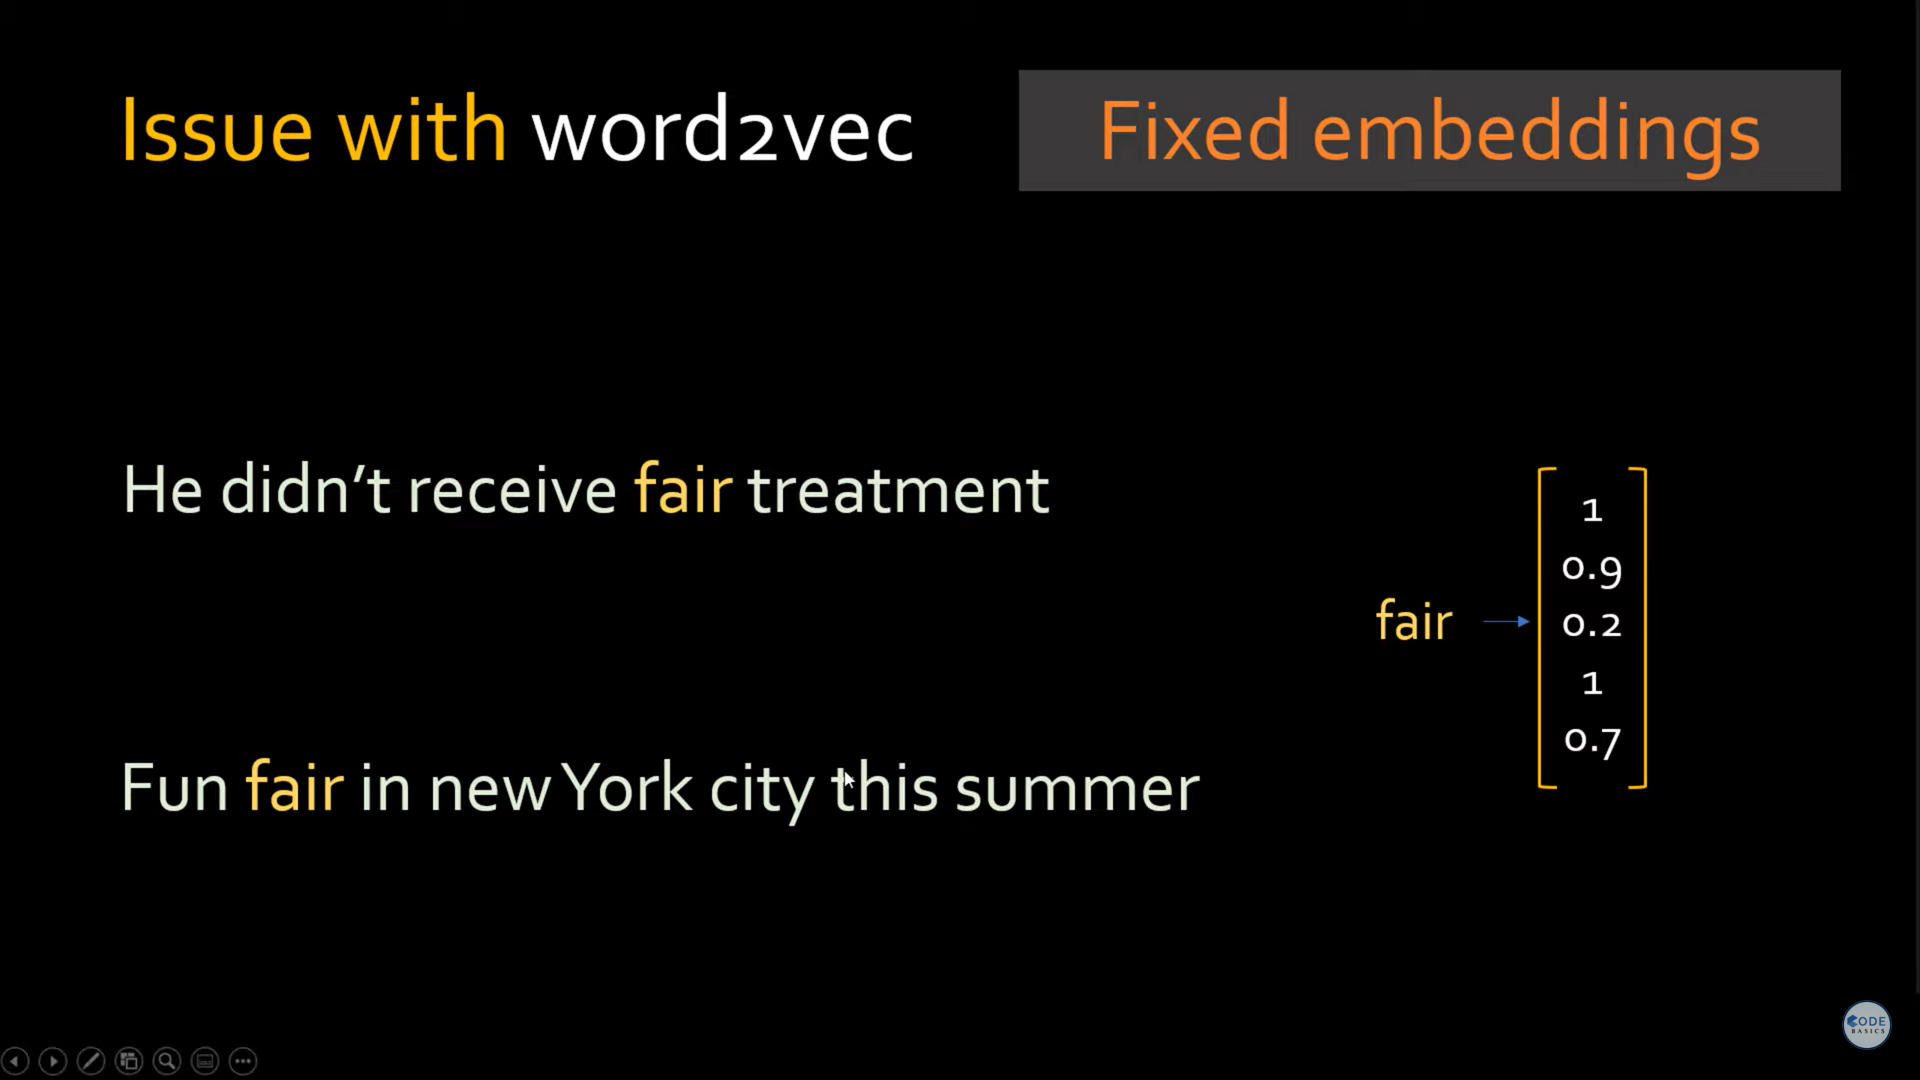
Here the meaning of word "fair" is differenct but same embedding vector is generated by the Word2Vec.

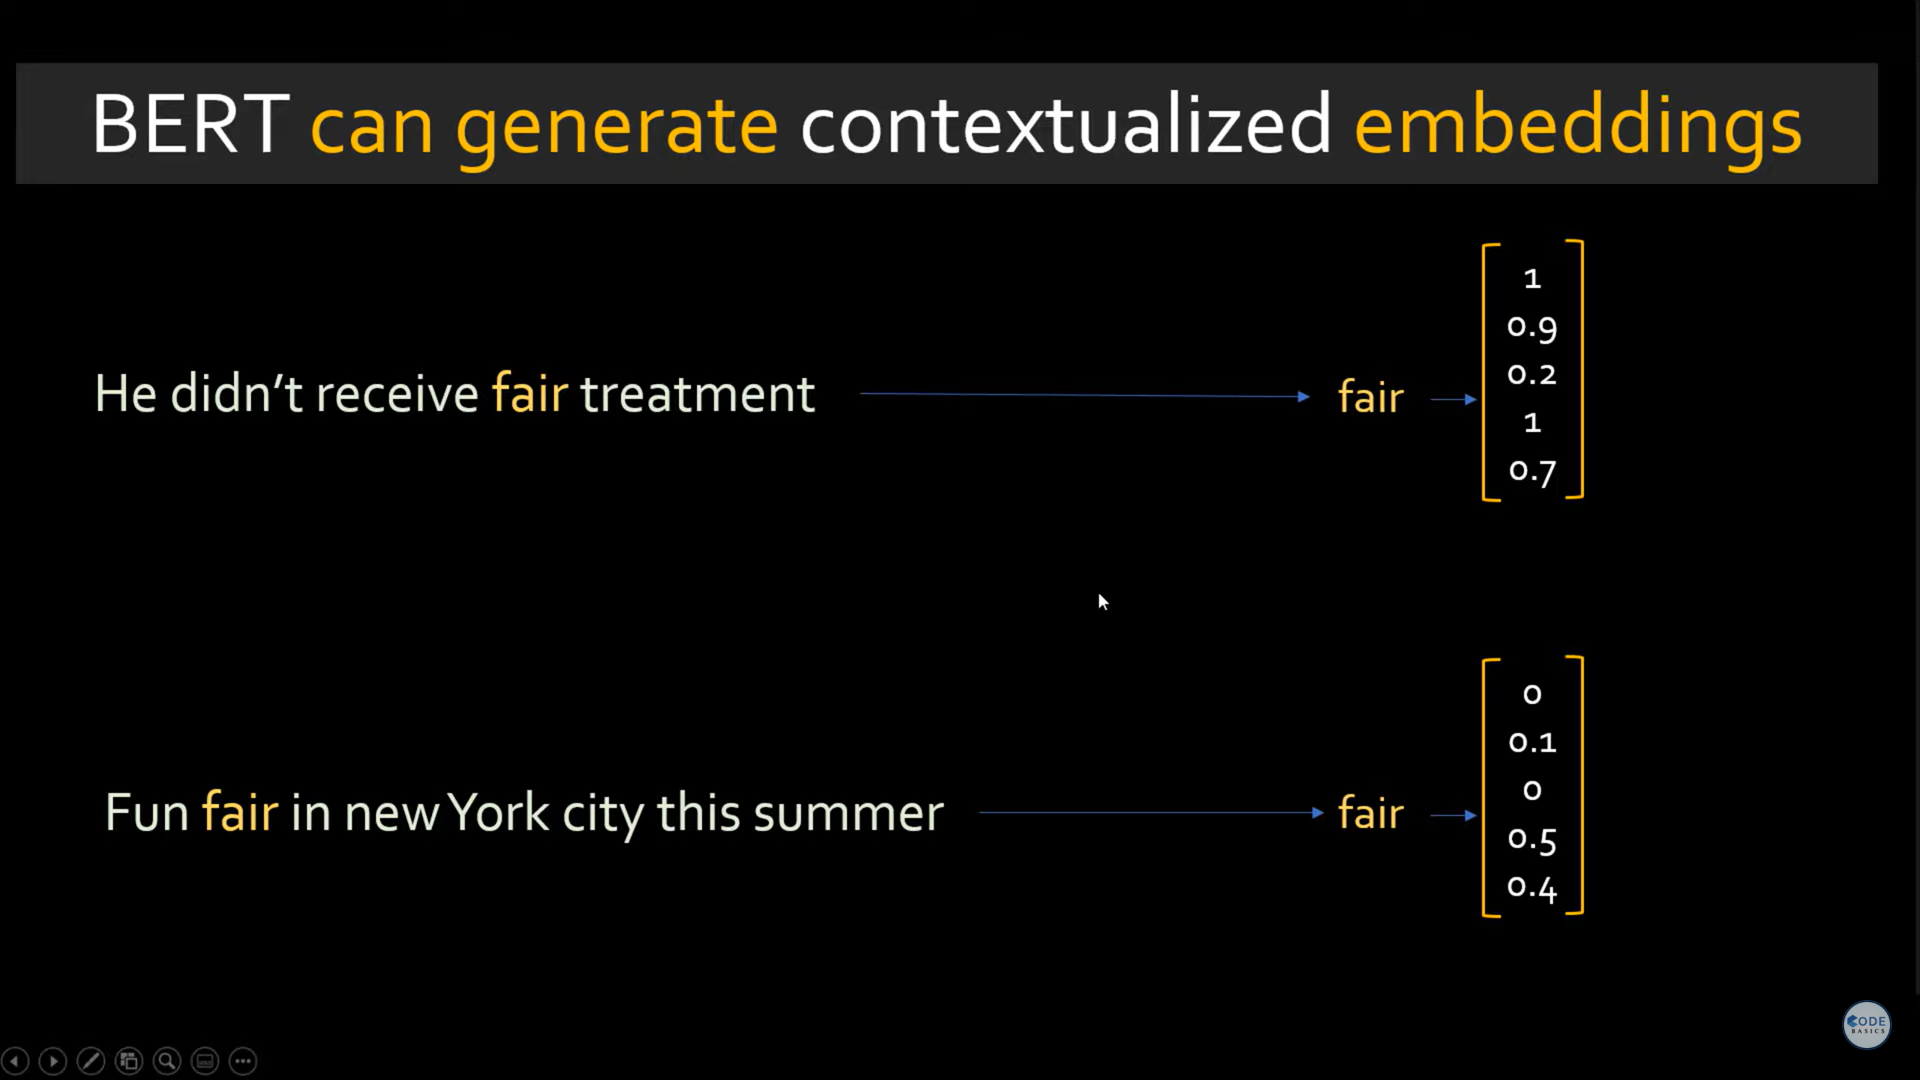
Here, BERT generated two different embedding vectors.

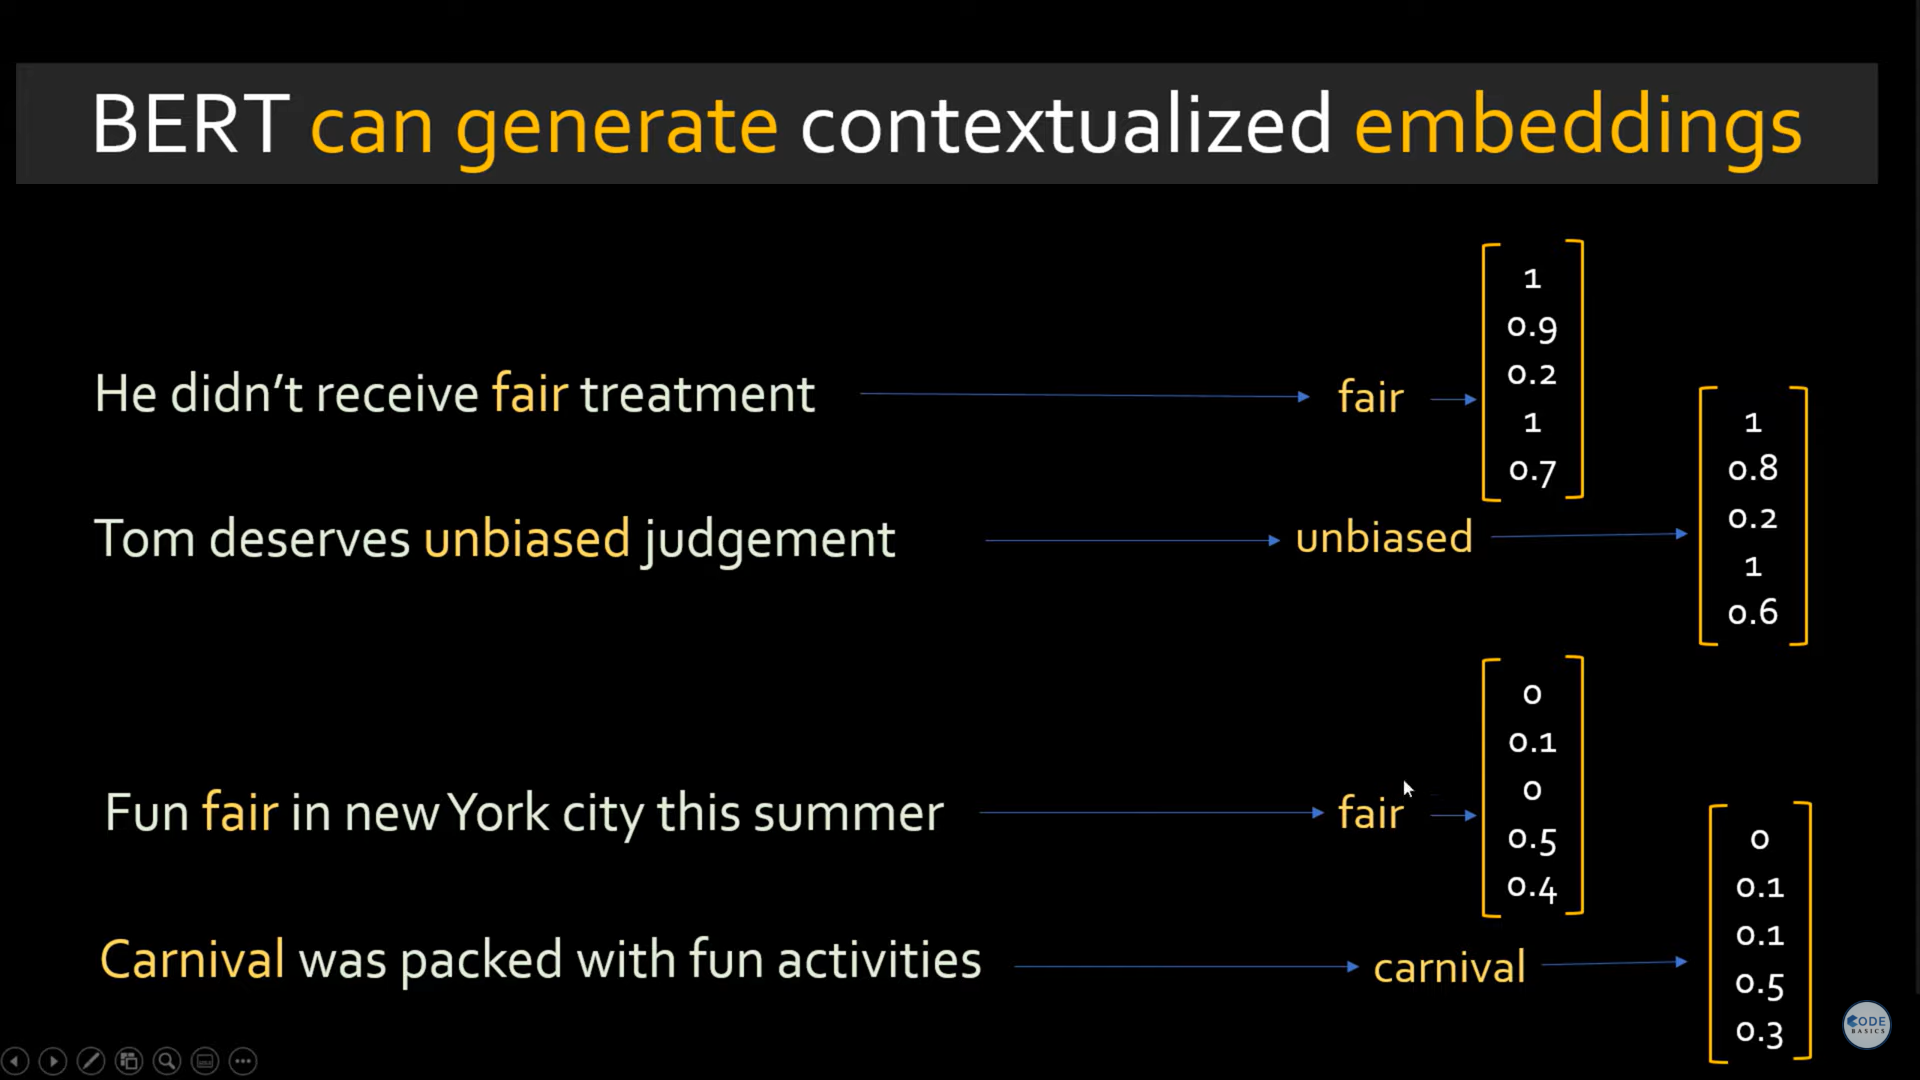

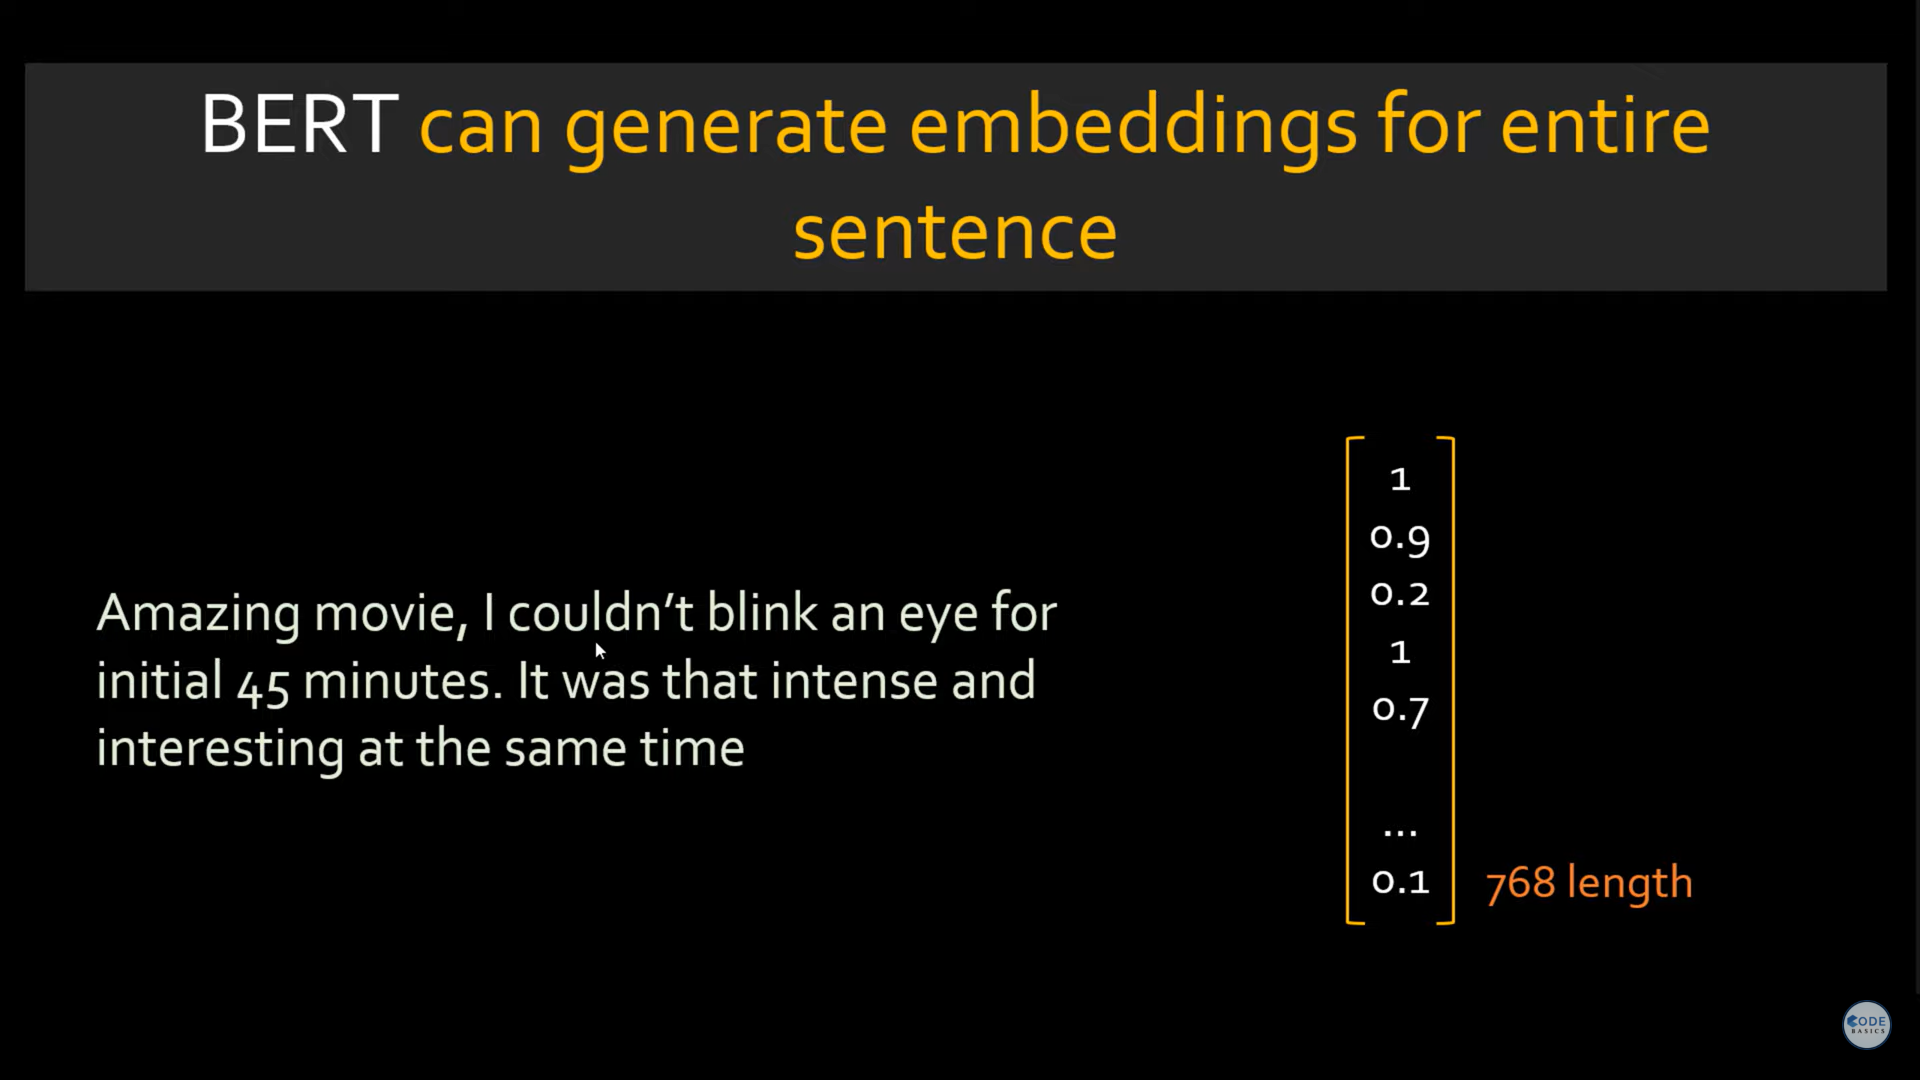
Generally, BERT generates embedding vector of length 768.

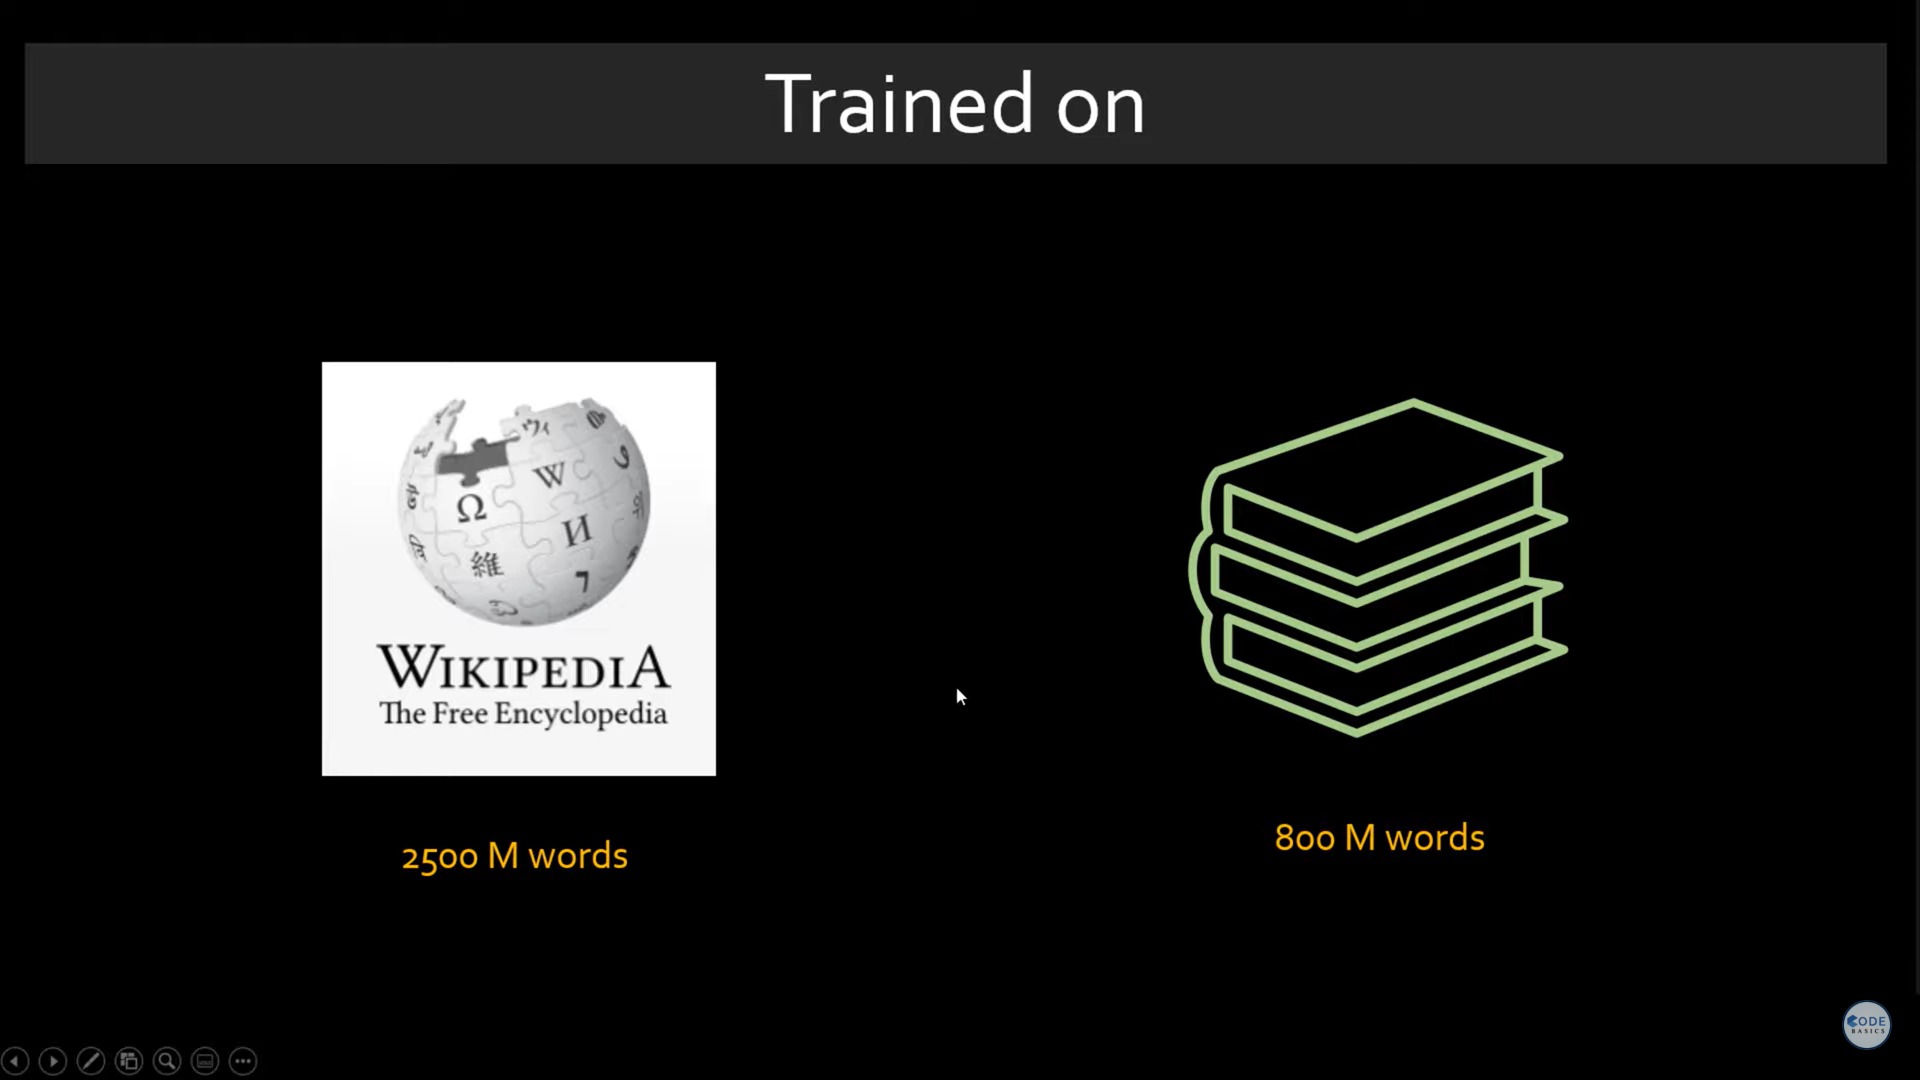
BERT model is trained by google by collecting 2500 million words from wikipedia and 800 million words from several books and dictionaries.

The model is trained on two tasks:
1. Mased Langage Model
2. Next Sentence Prediction

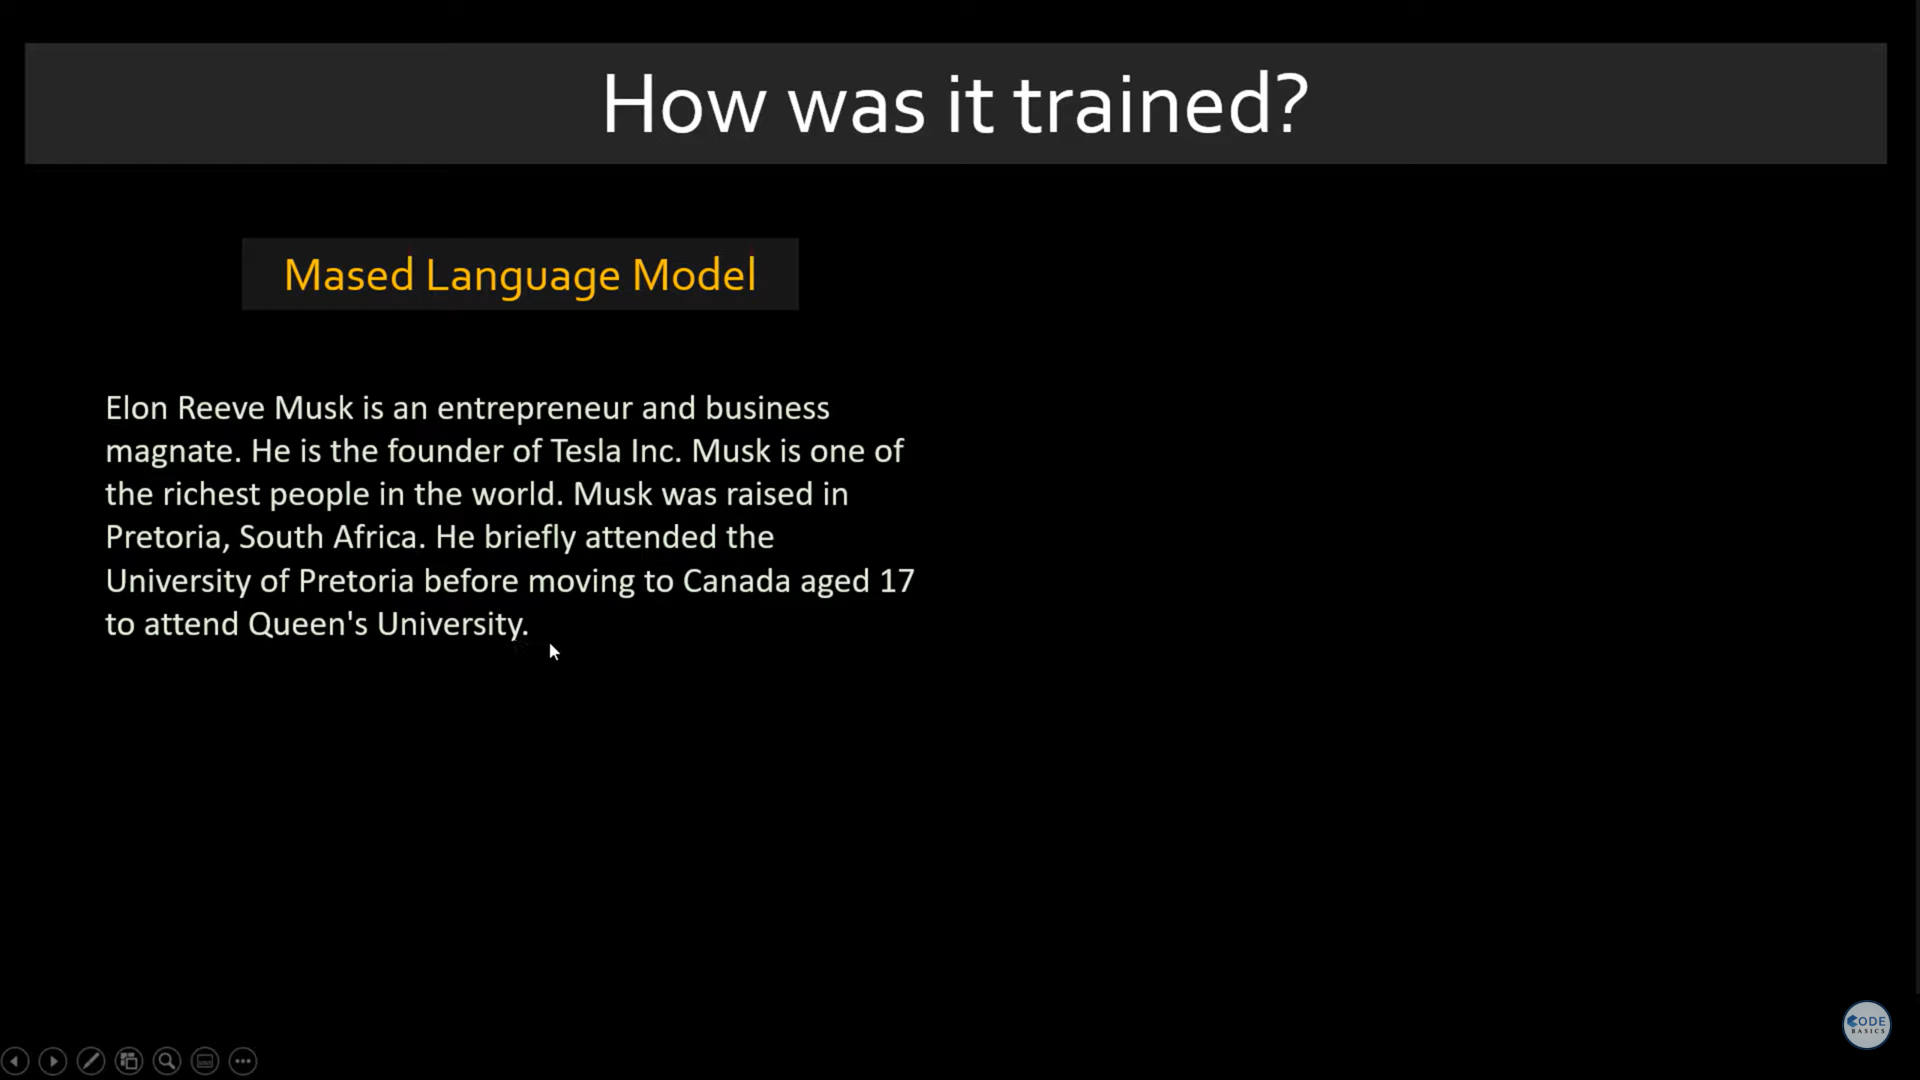

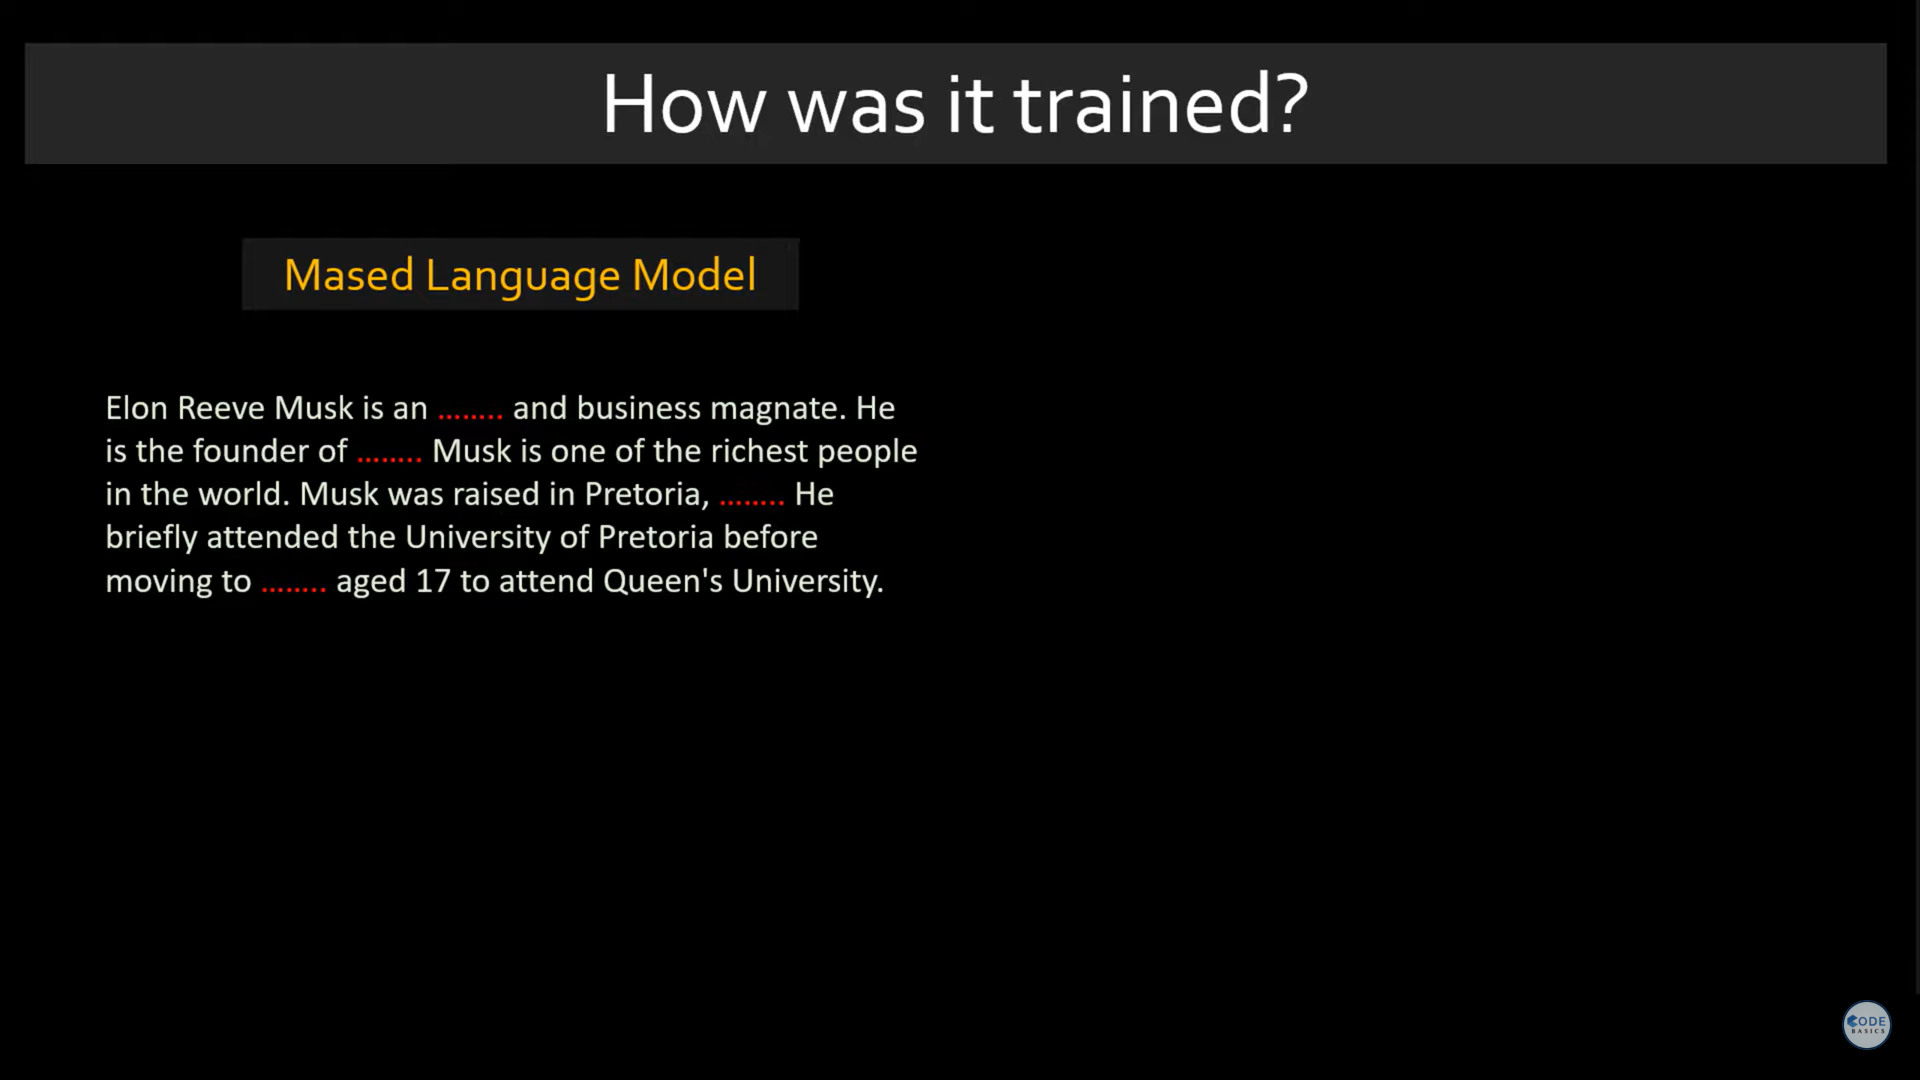
Here 15% of the words are mased and BERT model is trained.   
By performing this Artificial task, Word embeddings are generated as a side effect.

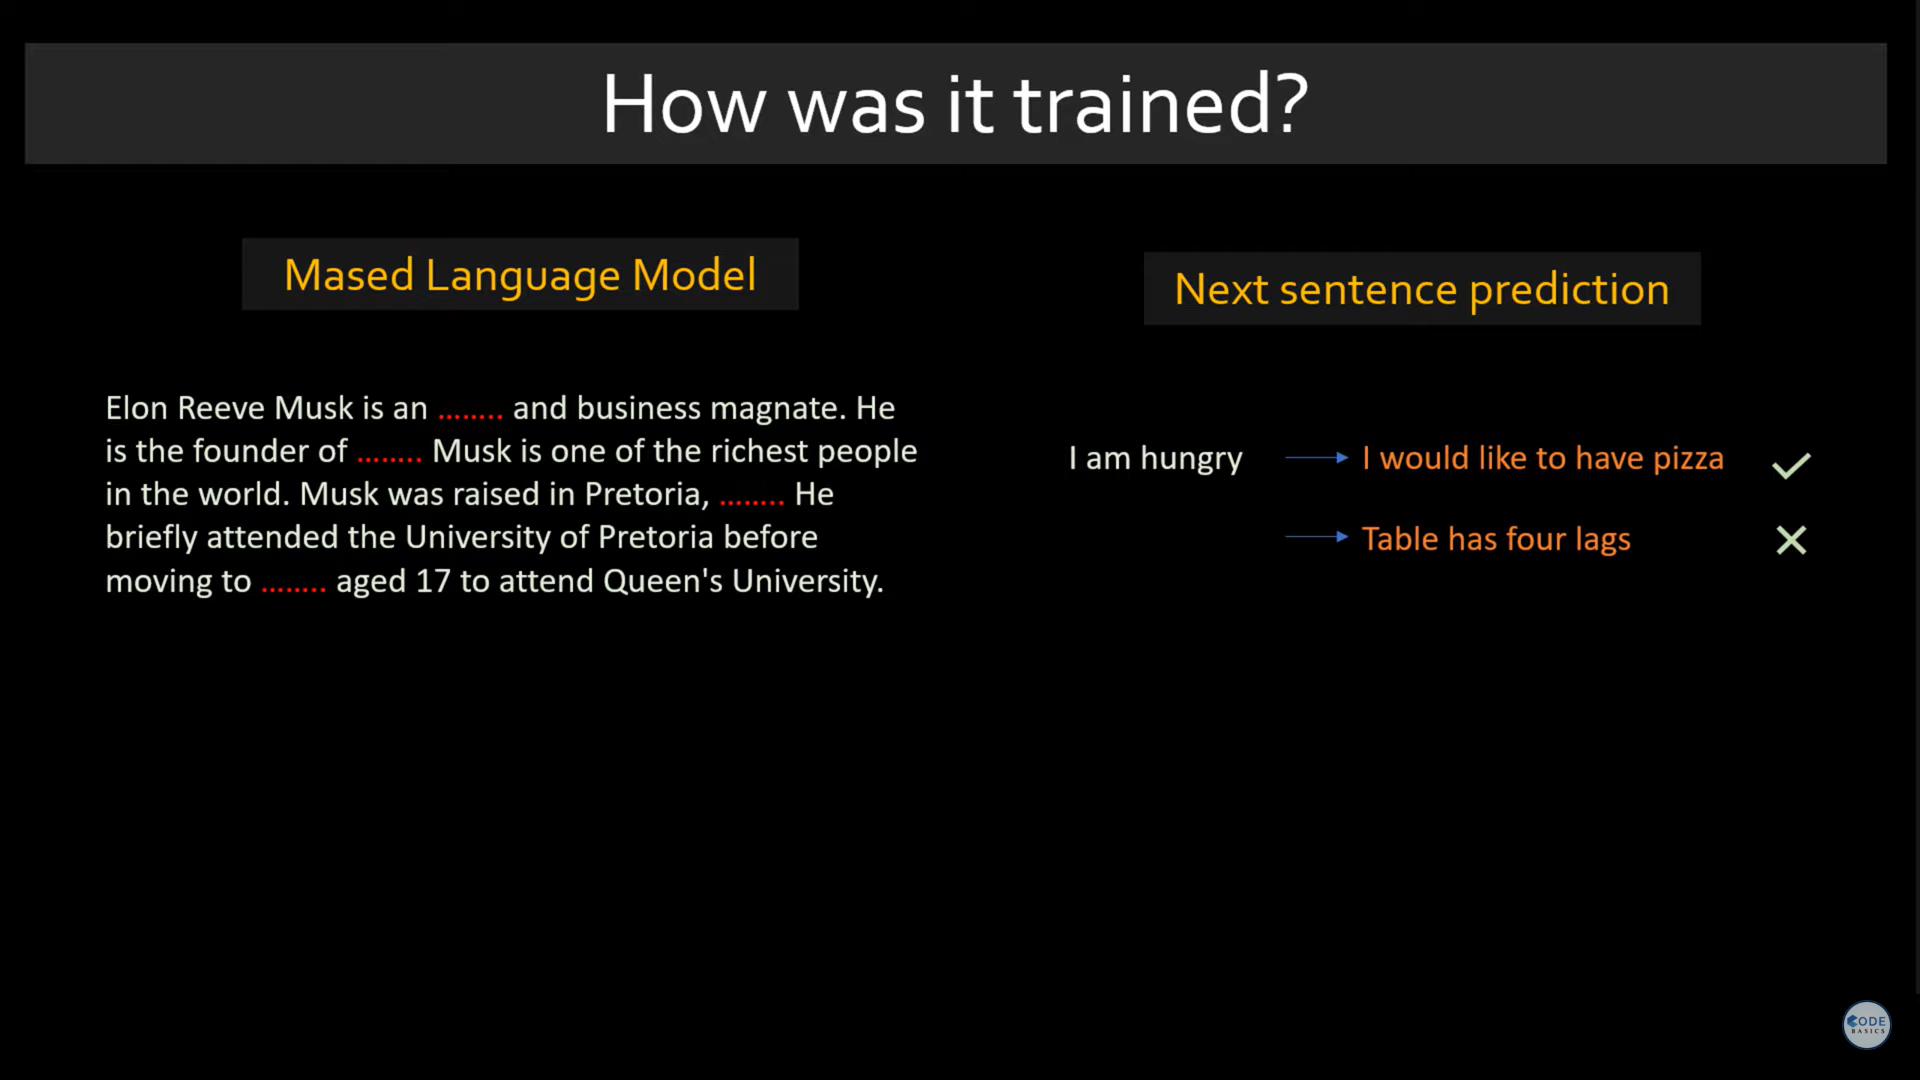

Very well explained about BERT in this article - http://jalammar.github.io/illustrated-bert/

In [2]:
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
preprocess_url="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
hub_url="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [4]:
bert_preprocess_model=hub.KerasLayer(preprocess_url)
#bert_process_model acts as a function

In [5]:
text_test=['nice movie indeed','i love python programming']
text_processed=bert_preprocess_model(text_test)
#text_processed is a dictionary

In [7]:
text_processed.keys()

dict_keys(['input_mask', 'input_word_ids', 'input_type_ids'])

In [8]:
text_processed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

Here, shape is (2,128)       
2 -> two sentences      
128 -> maximum sentence size       
In the first array, there are five 1's.
That indicates -> CLS nice movie indeed SEP   
BERT puts special token called CLS infront and special token called SEP at end to seperate two sentences

In [9]:
text_processed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

for CLS - 101 and SEP - 102 are fixed.   
Remaining are unique id numbers for a particular words.

In [10]:
text_processed['input_type_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [12]:
bert_model=hub.KerasLayer(hub_url)
bert_results=bert_model(text_processed)
#bert_results is a dictionary

In [13]:
bert_results.keys()

dict_keys(['default', 'pooled_output', 'encoder_outputs', 'sequence_output'])

In [14]:
bert_results['default'] #I don't know what is gives but it gave similar result as "pooled_output"

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7917741 , -0.21411933,  0.49769458, ...,  0.2446516 ,
        -0.47334474,  0.8175871 ],
       [-0.9171232 , -0.47935176, -0.78656995, ..., -0.6175179 ,
        -0.7102687 ,  0.921843  ]], dtype=float32)>

In [15]:
bert_results['pooled_output'] #it gives the embedding vector for each sentence

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7917741 , -0.21411933,  0.49769458, ...,  0.2446516 ,
        -0.47334474,  0.8175871 ],
       [-0.9171232 , -0.47935176, -0.78656995, ..., -0.6175179 ,
        -0.7102687 ,  0.921843  ]], dtype=float32)>

Here, shape=(2, 768)    
2 -> two sentences           
768 -> length of embedding vector generated by BERT (as already seen above)

In [18]:
bert_results['sequence_output'] #it gives the embedding vector for each word of each sentence

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292046,  0.08567803,  0.14476834, ..., -0.09677116,
          0.08722133,  0.07711101],
        [ 0.17839415, -0.1900607 ,  0.50349444, ..., -0.05869861,
          0.327171  , -0.1557856 ],
        [ 0.18701461, -0.4338877 , -0.48875138, ..., -0.15502766,
          0.00145099, -0.24470963],
        ...,
        [ 0.12083066,  0.12884238,  0.46453527, ...,  0.07375523,
          0.17441952,  0.16522099],
        [ 0.07967862, -0.01190662,  0.502254  , ...,  0.13777755,
          0.210022  ,  0.00624555],
        [-0.07212693, -0.28303438,  0.59033406, ...,  0.47551903,
          0.16668476, -0.08920355]],

       [[-0.07900587,  0.36335117, -0.21101575, ..., -0.17183766,
          0.16299757,  0.6724269 ],
        [ 0.27883485,  0.4371631 , -0.3576474 , ..., -0.04463645,
          0.38315225,  0.58879864],
        [ 1.2037672 ,  1.0727019 ,  0.48408756, ...,  0.24921048,
          0.40730965,  0.40481815],
        ...,

Here, shape=(2, 128, 768)    
2 -> two sentences    
128 -> length of each sentences after padding (maximum length)      
768 -> length of embedding vector generated by BERT (as already seen above)

In [16]:
bert_results['encoder_outputs'] #it gives the embedding vectors of all the 12 layers

[<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
 array([[[ 0.12901424,  0.00644747, -0.03614966, ...,  0.04999633,
           0.06149189, -0.02657543],
         [ 1.1753384 ,  1.2140785 ,  1.1569982 , ...,  0.11634388,
          -0.3585534 , -0.4049018 ],
         [ 0.03859033,  0.53869975, -0.21089774, ...,  0.21858197,
           0.7260166 , -1.1158603 ],
         ...,
         [-0.07587022, -0.25421908,  0.7075512 , ...,  0.50541985,
          -0.18878683,  0.1502833 ],
         [-0.16066611, -0.28089672,  0.57597065, ...,  0.5275855 ,
          -0.11141385,  0.02887556],
         [-0.04428175, -0.2027959 ,  0.5909356 , ...,  0.8133835 ,
          -0.39075807, -0.02601743]],
 
        [[ 0.1890359 ,  0.02752551, -0.0651374 , ..., -0.00620212,
           0.15053892,  0.03165445],
         [ 0.5916147 ,  0.7589138 , -0.07240652, ...,  0.6190394 ,
           0.8292891 ,  0.16161953],
         [ 1.4460827 ,  0.4460265 ,  0.4099025 , ...,  0.4825592 ,
           0.62691146,  0.13

In [20]:
len(bert_results['encoder_outputs'])
#length is 12 since we are using "BERT base" i.e 12 layers

12

In [22]:
bert_results['encoder_outputs'][-1] #it gives "sequence output"

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292046,  0.08567803,  0.14476834, ..., -0.09677116,
          0.08722133,  0.07711101],
        [ 0.17839415, -0.1900607 ,  0.50349444, ..., -0.05869861,
          0.327171  , -0.1557856 ],
        [ 0.18701461, -0.4338877 , -0.48875138, ..., -0.15502766,
          0.00145099, -0.24470963],
        ...,
        [ 0.12083066,  0.12884238,  0.46453527, ...,  0.07375523,
          0.17441952,  0.16522099],
        [ 0.07967862, -0.01190662,  0.502254  , ...,  0.13777755,
          0.210022  ,  0.00624555],
        [-0.07212693, -0.28303438,  0.59033406, ...,  0.47551903,
          0.16668476, -0.08920355]],

       [[-0.07900587,  0.36335117, -0.21101575, ..., -0.17183766,
          0.16299757,  0.6724269 ],
        [ 0.27883485,  0.4371631 , -0.3576474 , ..., -0.04463645,
          0.38315225,  0.58879864],
        [ 1.2037672 ,  1.0727019 ,  0.48408756, ...,  0.24921048,
          0.40730965,  0.40481815],
        ...,

# Email spam detection using BERT

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("D:\programming languages\datasets\email_spam.csv")

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [5]:
#There is an imbalance in the data and hence undersampling it
#Undersampling is not suggestable but for the sake of simplicity undersampling is choosen
data_spam=data[data.Category=='spam']
data_ham=data[data.Category=='ham']
data_spam.shape,data_ham.shape

((747, 2), (4825, 2))

In [6]:
#Undersampling
data_ham_undersampled=data_ham.sample(747)
data_ham_undersampled.shape

(747, 2)

In [7]:
balanced_data=pd.concat([data_ham_undersampled,data_spam])
balanced_data

,Category,Message
4390,ham,"K I'm ready, &lt;#&gt; ?"
3806,ham,Dude while were makin those weirdy brownies my...
2179,ham,"I don,t think so. You don't need to be going o..."
2690,ham,"Ya ok, vikky vl c witin &lt;#&gt; mins and il..."
3794,ham,Hey are you angry with me. Reply me dr.
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [8]:
balanced_data.Category.value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [9]:
#creating a new column "spam" that consists of 1 for spam and 0 for ham
balanced_data['spam']=balanced_data.Category.apply(lambda x : 1 if x=="spam" else 0)

In [10]:
balanced_data

,Category,Message,spam
4390,ham,"K I'm ready, &lt;#&gt; ?",0
3806,ham,Dude while were makin those weirdy brownies my...,0
2179,ham,"I don,t think so. You don't need to be going o...",0
2690,ham,"Ya ok, vikky vl c witin &lt;#&gt; mins and il...",0
3794,ham,Hey are you angry with me. Reply me dr.,0
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [11]:
x=balanced_data[['Message']]
y=balanced_data['spam']

In [12]:
x

,Message
4390,"K I'm ready, &lt;#&gt; ?"
3806,Dude while were makin those weirdy brownies my...
2179,"I don,t think so. You don't need to be going o..."
2690,"Ya ok, vikky vl c witin &lt;#&gt; mins and il..."
3794,Hey are you angry with me. Reply me dr.
...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,Had your contract mobile 11 Mnths? Latest Moto...
5566,REMINDER FROM O2: To get 2.50 pounds free call...


In [13]:
y

4390    0
3806    0
2179    0
2690    0
3794    0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: spam, Length: 1494, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y)

In [15]:
x_train.shape,y_train.shape

((1120, 1), (1120,))

In [16]:
x_test.shape,y_test.shape

((374, 1), (374,))

In [17]:
preprocess_url="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
hub_url="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [18]:
bert_preprocess=hub.KerasLayer(preprocess_url)
bert_encoder=hub.KerasLayer(hub_url)

In [19]:
#this function takes sentences as an input and return sentence embedding vectors
def get_sentence_embedding(sentences):
    preprocessed_text=bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [20]:
get_sentence_embedding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435169 , -0.5132727 , -0.8884573 , ..., -0.7474888 ,
        -0.7531474 ,  0.91964483],
       [-0.8720835 , -0.50543964, -0.9444669 , ..., -0.85847497,
        -0.7174535 ,  0.8808299 ]], dtype=float32)>

**Get embeding vectors for few sample words. Compare them using cosine similarity**

In [21]:
e = get_sentence_embedding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
#checking cosine similarity for banana and grapes
cosine_similarity([e[0]],[e[1]])

array([[0.99110866]], dtype=float32)

In [24]:
#checking cosine similarity for mango and bill gates
cosine_similarity([e[2]],[e[3]])

array([[0.8494536]], dtype=float32)

Values near to 1 means they are similar. 0 means they are very different. Above you can use comparing "banana" vs "grapes" you get 0.99 similarity as they both are fruits

**Build Model**      
There are two types of models you can build in tensorflow.        
1. Sequential
2. Functional

So far we have built sequential model. But below we will build functional model. More information on these two is here: https://becominghuman.ai/sequential-vs-functional-model-in-keras-20684f766057

In [25]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [27]:
len(x_train)

1120

In [28]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
#training the model
model.fit(x_train,y_train,epochs=10)

Since it is taking so much time for training, I am attaching link of jupyter notebook file - https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/47_BERT_text_classification/BERT_email_classification-handle-imbalance.ipynb